In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
ds = pd.read_csv('Data_Set/Dummy_Data_HSS.csv')
ds

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
ds.shape

(4572, 5)

In [4]:
ds.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

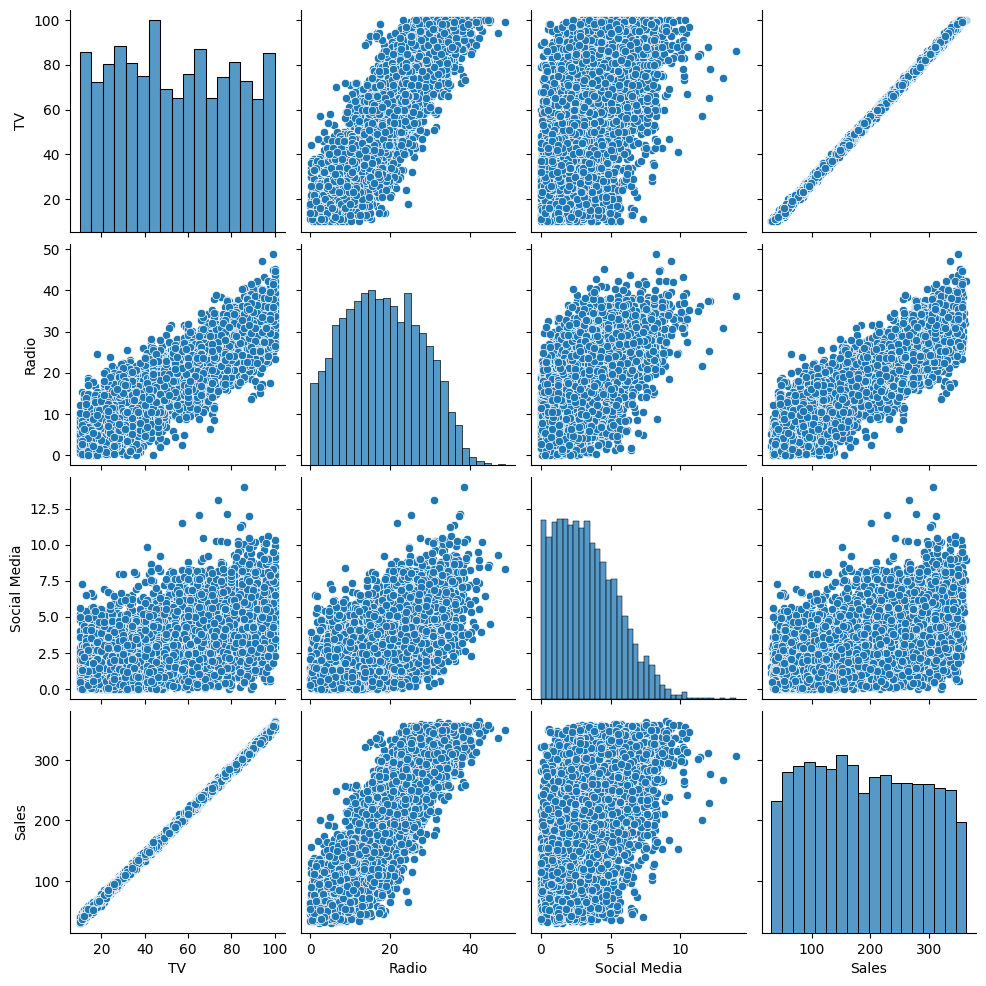

In [5]:
sn.pairplot(ds)
plt.show()

In [6]:
train = ds.sample(frac= 0.75 , random_state =0)
test = ds.drop(train.index)

In [7]:
train.head()

,TV,Radio,Social Media,Influencer,Sales
3235,45.0,17.127520,1.462857,Micro,157.656160
1912,74.0,29.520170,2.333157,Nano,264.592233
3656,84.0,28.255844,5.699994,Mega,298.882343
2772,83.0,34.685101,10.030244,Mega,298.639410
130,21.0,1.380311,5.286681,Mega,80.940725


In [8]:
test.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
3,83.0,30.020028,6.922304,Mega,298.246340
7,31.0,17.355042,2.289855,Nano,108.733932
12,64.0,20.240424,3.921148,Micro,229.632381
21,78.0,35.568224,2.832450,Macro,276.401340


In [9]:
train_subset = train[['Radio' , 'Sales']]
test_subset = train[['Radio' , 'Sales']]

In [10]:
# The formula should be 'Sales ~ Radio' to specify Sales as the outcome and Radio as the predictor
ols_ds = ols(formula='Sales ~ Radio', data=train_subset)

In [11]:
model = ols_ds.fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                 1.047e+04
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:18:30   Log-Likelihood:                -17950.
No. Observations:                3421   AIC:                         3.590e+04
Df Residuals:                    3419   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8337      1.669     25.070      0.000      38.562      45.105
Radio          8.3079      0.081    102.308      0.000       8.149       8.467
==============================================================================
Omnibus:                        1.170   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                1.123
Skew:                           0.007   Prob(JB):                        0.570
Kurtosis:                       3.088   Cond. No.                         43.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

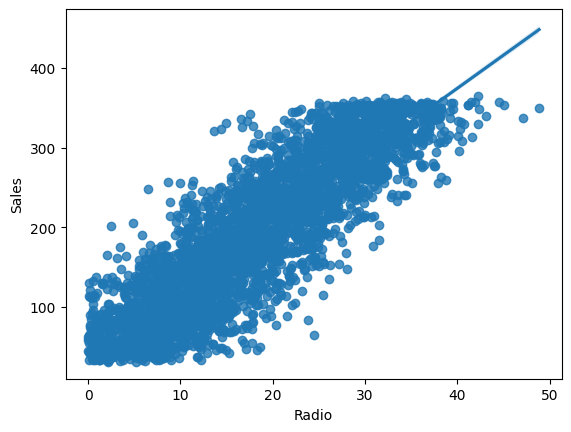

In [13]:
sn.regplot(x= 'Radio' , y = 'Sales' , data=train_subset)
plt.show()

In [14]:
residuals = model.resid
residuals

3235   -26.470731
1912   -22.491187
3656    22.302781
2772   -31.353587
130     27.639606
          ...    
186      6.002123
4210    56.093796
2015    36.173617
2716   -46.708955
2845   -54.943295
Length: 3421, dtype: float64

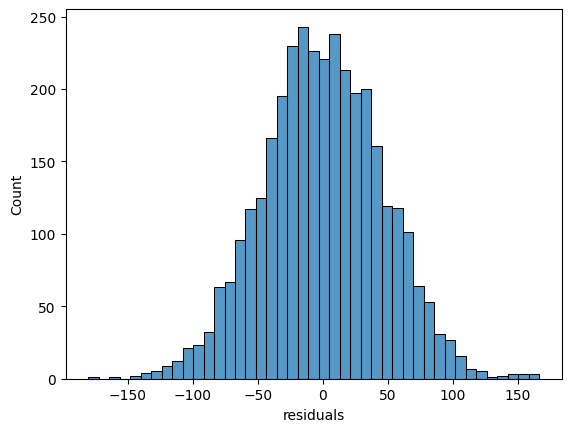

In [15]:
sn.histplot(residuals)
plt.xlabel('residuals')
plt.show()

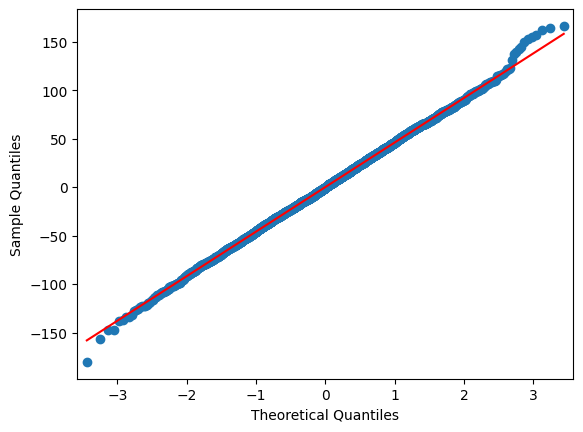

In [16]:
sm.qqplot(residuals , line='s')
plt.show()

In [17]:
preds_train = model.predict(train_subset['Radio'])
preds_train

3235    184.126891
1912    287.083421
3656    276.579562
2772    329.992997
130      53.301119
           ...    
186     252.356845
4210    255.511511
2015     75.628722
2716    122.636755
2845    412.035782
Length: 3429, dtype: float64

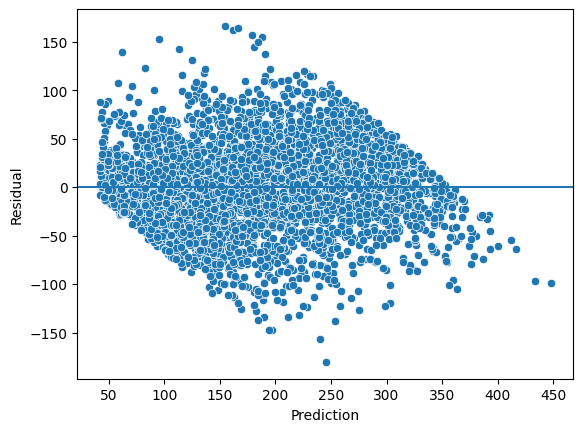

In [18]:
sn.scatterplot(x = preds_train , y = residuals )
plt.axhline(0)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

In [19]:
preds_test = model.predict(test_subset['Radio'])
preds_train

3235    184.126891
1912    287.083421
3656    276.579562
2772    329.992997
130      53.301119
           ...    
186     252.356845
4210    255.511511
2015     75.628722
2716    122.636755
2845    412.035782
Length: 3429, dtype: float64